# Finding Manchester United's Next Striker

I love football (soccer) and since I am a cultured man, I've been supporting Manchester United for most of my life. Manchester United is historically the most successful football club in English football. However, in recent years United have fallen behind their competitors failing to win the league in the last 10 years. There are many reasons as to why United have been in decline, but with a recent change in management both on and potentially off the field Manchester United might be making a comeback to the very top of world football. 

Coming off a relatively successful season, Manchester United is looking to bolster their squad this summer transfer window and their priority signing needs to be a striker. Having recently transitioned into a far more effective tactical system, Manchester United have been creating significantly more chances than previous seasons but lack a proficient striker who is able to convert these chances into goals. The purpose of this project is to analyze all the players in Europes top 5 leagues to help Manchester United narrow down and find a striker they can sign. I'm really looking forward to this project and I'm curious to see what options are available to us.


Here is a breakdown of each section of the project:

1. Basic Data Exploration
2. Data Transformation
3. Exploratory Data Analysis (EDA)
4. Cluster Analysis
5. Creation of Final Sample Selections
6. Selecting 3 Top Targets


In [ ]:
import os as os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from IPython.display import display, HTML


# Basic Data Exploration 

In [200]:
df = pd.read_csv('archive/footballstats.csv',encoding='ISO-8859-1', delimiter=';')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [4]:
def table_top(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

numerical_features = df.select_dtypes(include=[np.number])
summary_statistics = numerical_features.describe().T
html_numerical = table_top(summary_statistics, 'numerical_features', 'Summary statistics')

display(HTML(html_numerical))



,count,mean,std,min,25%,50%,75%,max
Rk,2689.0,1345.000000,776.391761,1.0,673.00,1345.00,2017.00,2689.00
Age,2689.0,26.011157,4.446259,15.0,23.00,26.00,29.00,41.00
Born,2689.0,1996.155820,4.450108,1981.0,1993.00,1996.00,2000.00,2007.00
MP,2689.0,11.833023,6.864278,1.0,5.00,13.00,18.00,23.00
Starts,2689.0,8.476013,6.994383,0.0,2.00,7.00,14.00,23.00
Min,2689.0,760.451097,591.094260,1.0,194.00,684.00,1245.00,2070.00
90s,2689.0,8.450465,6.567484,0.0,2.20,7.60,13.80,23.00
Goals,2689.0,1.027520,2.013714,0.0,0.00,0.00,1.00,25.00
Shots,2689.0,1.245787,1.424619,0.0,0.26,0.86,1.85,15.00
SoT,2689.0,0.411261,0.754716,0.0,0.00,0.18,0.59,10.00


In [201]:
#Analysis of Null Values
null_values = df.isnull().sum()
html_null_values = table_top(null_values.to_frame(), 'null_values', 'Null values in the dataset')

missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = table_top(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Rk,0
Player,0
Nation,1
Pos,0
Squad,0
Comp,0
Age,0
Born,0
MP,0
Starts,0


# Data Transformation

In [202]:
# Find rows with null values
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)
#David Ozoh is the only null value in the dataset, but since he's very young and has hardly played he isn't very relevant to our eda
df.dropna()

        Rk      Player Nation Pos           Squad            Comp  Age  Born  \
1875  1876  David Ozoh    NaN  FW  Crystal Palace  Premier League   17  2005   

      MP  Starts  ...  Off  Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  \
1875   1       0  ...  0.0  0.0   0.0    0.0    0.0  0.0    0.0     0.0   

      AerLost  AerWon%  
1875      0.0      0.0  

[1 rows x 124 columns]


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,2685,Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
2685,2686,Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
2686,2687,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,0.38,0.00,0.13,0.0,0.0,0.00,2.05,14.50,3.59,80.1


In [203]:
#Find duplicates
duplicates = df.duplicated(subset=['Player'])
duplicate_rows = df[duplicates]

duplicate_rows_html = duplicate_rows.to_html()
duplicate_rows_html_with_css = f"<div style='height: 300px; overflow-y: scroll;'>{duplicate_rows_html}</div>"
display(HTML(duplicate_rows_html_with_css))

#it would appear that many of the duplicates in this dataset are players that transfered to another team mid-season alongside some errors.
#I'm going to drop duplicates since most of these players aren't the kind of players we are looking for. In any case, we have a copy of the duplicates for reference here

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,107,1.2,1,5.00,1.67,33.3,0.17,0.50,12.2,0.00,0.00,0.00,5.83,12.50,46.7,107.5,25.0,2.50,5.00,50.0,2.50,3.33,75.0,0.83,0.83,100.0,0.00,1.67,0.83,0.83,0.00,1.67,12.50,12.50,0.00,0.00,0.83,0.00,1.67,0.00,0.00,0.00,0.00,0.00,5.83,0.00,0.83,5.83,1.67,0.00,0.00,2.50,0.83,0.83,1.67,0.00,0.00,0.00,0.00,0.83,0.83,0.83,0.83,0.00,0.00,0.83,0.83,0.83,100.0,0.00,0.83,0.00,0.83,1.67,2.50,0.83,0.00,30.8,0.83,0.83,12.50,18.30,12.50,30.8,0.00,0.00,0.0,0.00,0.0,22.50,145.0,87.50,3.33,0.83,1.67,8.33,0.83,22.50,9.17,0.00,0.00,0.00,2.50,4.17,0.83,1.67,0.83,0.83,0.00,0.00,1.67,0.83,3.33,20.0
32,33,Naouirou Ahamada,FRA,MF,Stuttgart,Bundesliga,20,2002,17,17,1398,15.5,2,1.03,0.32,31.3,0.13,0.40,22.1,0.00,0.00,0.00,29.00,34.10,84.9,449.4,106.5,14.40,15.60,92.1,12.10,13.20,91.7,1.35,2.58,52.5,0.13,0.97,2.45,0.45,0.13,3.61,34.10,33.20,0.84,0.26,0.13,0.06,0.39,0.32,0.00,0.00,0.00,0.00,29.00,0.13,0.84,2.45,2.00,0.00,0.19,0.13,0.06,0.06,0.45,0.45,0.00,0.00,0.00,0.00,0.00,1.10,0.71,0.45,0.45,0.19,0.52,1.29,40.0,0.77,1.03,0.32,0.71,0.52,1.61,0.45,0.00,43.5,1.16,8.97,25.00,10.30,1.42,43.5,2.71,1.16,42.9,1.29,47.6,26.30,192.4,97.50,2.77,1.74,0.39,2.19,0.71,29.20,3.48,0.26,0.06,0.06,1.03,1.10,0.06,0.39,0.71,0.00,0.06,0.00,5.68,0.45,1.03,30.4
41,42,Ludovic Ajorque,FRA,FW,Mainz 05,Bundesliga,28,1994,4,3,231,2.6,0,2.69,0.77,28.6,0.00,0.00,16.4,0.00,0.00,0.00,16.90,33.80,50.0,300.8,70.8,8.46,15.80,53.7,4.23,10.40,40.7,3.08,3.85,80.0,0.38,1.54,2.31,0.38,0.00,2.31,33.80,33.10,0.00,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,0.00,16.90,0.77,0.77,3.08,2.69,0.00,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.0,0.38,1.15,0.00,1.15,0.00,0.00,0.77,0.00,44.6,0.77,2.69,23.50,18.80,5.38,44.6,0.77,0.38,50.0,0.38,50.0,18.10,78.8,26.20,0.77,0.00,0.00,4.23,1.92,33.50,5.38,0.38,0.00,0.00,2.31,0.38,0.38,0.38,0.00,0.00,0.00,0.00,5.00,10.00,7.69,56.5
87,88,Bruno Amione,ARG,DF,Sampdoria,Serie A,21,2002,10,10,790,8.8,0,0.57,0.11,20.0,0.00,0.00,13.7,0.00,0.00,0.00,36.70,47.60,77.1,642.0,245.3,15.30,17.80,86.0,18.50,22.50,82.3,2.73,5.45,50.0,0.11,0.23,0.91,0.34,0.11,2.50,47.60,41.10,6.25,2.05,0.00,0.00,0.34,4.20,0.00,0.00,0.00,0.00,36.70,0.23,1.14,0.68,0.57,0.00,0.00,0.11,0.00,0.00,0.11,0.00,0.00,0.00,0.11,0.00,0.00,2.61,1.59,1.93,0.68,0.00,1.14,1.82,62.5,0.68,1.14,0.45,0.68,1.25,3.86,2.39,0.11,58.0,4.77,32.30,21.60,4.66,1.36,58.0,0.23,0.00,0.0,0.23,100.0,27.00,103.1,41.60,0.23,0.45,0.00,0.91,0.00,28.10,0.68,0.57,0.00,0.00,1.14,0.68,0.00,0.34,1.59,0.00,0.11,0.00,5.34,3.30,1.82,64.4
138,139,Pierre-Emerick Aubameyang,GAB,FW,Barcelona,La Liga,33,1989,1,0,9,0.1,0,10.00,0.00,0.0,0.00,0.00,12.4,0.00,0.00,0.00,30.00,30.00,100.0,590.0,260.0,0.00,0.00,0.0,30.00,30.00,100.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,30.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,0.00,0.00,10.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.0,0.00,10.00,20.00,10.00,10.00,40.0,0.00,0.00,0.0,0.00,0.0,20.00,80.0,10.00,0.00,0.00,0.00,0.00,0.

In [9]:
#drop duplicates
df = df.drop_duplicates(keep='first')

In [10]:
#Determining what all the positions are
unique_values = df['Pos'].unique()
print(unique_values)

['MFFW' 'DF' 'MF' 'FWMF' 'FW' 'DFFW' 'MFDF' 'GK' 'DFMF' 'FWDF']


In [11]:
#filtering out forward players only
df2=df[df['Pos'].str.contains('FW')]

In [12]:
#Selecting the specifc columns I want to work with
df_stats= df2[['Player','Comp','MP','Goals','Assists','Shots','SoT','G/SoT','SoT%','ShoDist','PasAss','PasProg','GCA','PKwon','AerWon%','Pos','Min','Age']]

In [13]:
#Adding some additional information that could be important
df_stats.loc[:, 'Min/G'] = df_stats['Min'] / df_stats['Goals']
    

C:\Users\param\AppData\Local\Temp\ipykernel_24564\1281455888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats.loc[:, 'Min/G'] = df_stats['Min'] / df_stats['Goals']


In [14]:
#removing players who are not effective 
Minimum_goals = 3
Mimumum_mins = 360
df_stats = df_stats.loc[df_stats['Goals'] >= Minimum_goals].copy()
df_stats = df_stats.loc[df_stats['Min'] >= Mimumum_mins ].copy()


In [15]:
#This table is a collection of all the information we will need
full_table_html = df_stats.to_html()
full_table_html_with_css = f"<div style='height: 300px; overflow-y: scroll;'>{full_table_html}</div>"
display(HTML(full_table_html_with_css))

,Player,Comp,MP,Goals,Assists,Shots,SoT,G/SoT,SoT%,ShoDist,PasAss,PasProg,GCA,PKwon,AerWon%,Pos,Min,Age,Min/G
9,Zakaria Aboukhlal,Ligue 1,22,5,0.24,2.75,1.02,0.29,37.0,18.1,0.54,1.80,0.24,0.00,24.1,FWMF,1507,22,301.400000
10,Tammy Abraham,Serie A,22,6,0.17,2.67,1.25,0.27,46.8,11.6,1.42,2.10,0.51,0.06,51.7,FW,1582,25,263.666667
14,Che Adams,Premier League,21,4,0.11,2.06,0.74,0.31,36.1,14.5,1.20,1.31,0.29,0.00,37.1,FW,1577,26,394.250000
72,Miguel Almirón,Premier League,22,10,0.05,2.33,0.74,0.67,31.9,16.8,0.84,4.80,0.45,0.00,30.8,FW,1816,29,181.600000
78,Julián Álvarez,Premier League,16,4,0.00,2.97,1.25,0.50,42.1,15.6,0.94,2.81,0.00,0.00,31.3,FWMF,578,23,144.500000
93,Felipe Anderson,Serie A,22,6,0.11,1.18,0.64,0.50,54.5,14.2,1.55,3.32,0.48,0.00,34.8,FW,1687,29,281.166667
95,Komnen Andri?,Ligue 1,23,4,0.14,1.94,0.79,0.27,40.7,13.9,1.01,1.73,0.22,0.07,46.6,FW,1250,27,312.500000
99,Jaidon Anthony,Premier League,17,3,0.00,1.95,1.15,0.30,58.8,19.9,0.92,4.02,0.11,0.00,47.1,MFFW,783,23,261.000000
104,Antony,Premier League,12,3,0.00,3.27,1.39,0.21,42.4,20.4,0.79,2.77,0.10,0.00,27.3,FW,908,22,302.666667
120,Marko Arnautovi?,Serie A,14,8,0.00,1.59,0.76,0.50,47.6,15.7,1.44,2.12,0.23,0.00,41.2,FW,1189,33,148.625000


# Exploratory Data Analysis 

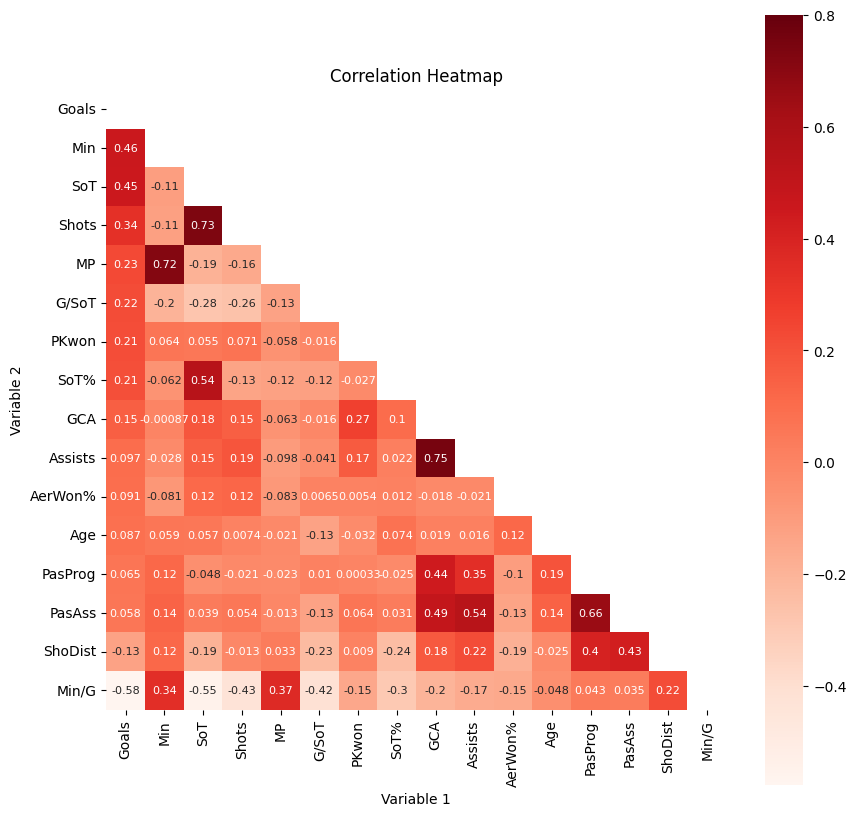

In [204]:
import matplotlib.pyplot as plt


numeric_cols = df_stats.select_dtypes(include=np.number)
corrmat = numeric_cols.corr().nlargest(20, "Goals")
corrmat = corrmat.T.sort_values("Goals", ascending=False)[:20]

# Create a mask to show only half of the map
mask = np.triu(np.ones_like(corrmat))

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(data=corrmat, mask=mask, annot=True, square=True, cmap='Reds', vmax=0.8, annot_kws={"fontsize": 8})

# Set the axis labels and title
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

**Insight**

As expected many of the goalscoring metrics are correlated with one another while many of the creative metrics are correlated with one another. One very intesting correlation was the weak to moderate correlation between shot distance and progressive passes made as well as shot distance with passes leading to a shot. I would think that players with a high shot distance play in a slightly deeper role which would mean that they naturally have a higher progressive pass rate and are more willing to pass the ball to a player who would make a shot. It's a neat piece of insight even though it doesn't directly have anything to do with helping us select a striker for Manchester United.

In [206]:
import plotly.express as px
fig = px.scatter(df_stats, x='G/SoT', y='Goals', hover_data=['Player','Min','Pos','Comp'], color='G/SoT', size='Goals',color_continuous_scale='Viridis')

fig.show()


In [207]:
#To trim down our selection group further, I decided to include cut out players who didn't meet a basic level of goalscoring efficiency
Minimum_goals_2 = 8
Mimumum_GSoT_2 = 0.30
df_stats2 =df_stats
df_stats2 = df_stats.loc[df_stats['Goals'] >= Minimum_goals_2].copy()
df_stats2 = df_stats.loc[df_stats['G/SoT'] >= Mimumum_GSoT_2 ].copy()


In [19]:
fig = px.scatter(df_stats2, x='GCA', y='Assists', hover_data=['Player','Min','Pos','Comp'], color='GCA', size='Assists',color_continuous_scale='plasma')

fig.show()

In [208]:
Minimum_Assists = 0.05
Mimumum_GCA = 0.2
df_stats3 = df_stats2
df_stats3 = df_stats3.loc[df_stats['Assists'] >= Minimum_Assists].copy()
df_stats3 = df_stats3.loc[df_stats['GCA'] >= Mimumum_GCA].copy()

In [199]:
fig = px.scatter(df_stats3, x='PasProg', y='PasAss', hover_data=['Player','Min','Pos','Comp'], color='PasProg', size='PasAss',color_continuous_scale='cividis')

fig.show()

In [210]:
df_stats4 = df_stats3

In [211]:
df_final = df_stats4[['Player','Goals','Assists','G/SoT','PasAss','PasProg','GCA']]

# Cluster Analysis

To help us narrow down our selection of players, I decided to perform some basic K-means clustering to group the players into specific groups. After clustering players, I would then attempt to determine what each cluster represents which would allow us to build a strategy for selecting a player to be Manchester United's next striker. 

I had initially tried using more sophisticated clustering techniques such as DBSCAN, but these techniques didn't work as well givent that they were optimized for analyzing dataframes with significantly more dimensions and nested clusters. K-means proved to be both a simple and effective way to cluster players. 

In [212]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select only the numeric columns we want to cluster
df_numeric = df_final[['Goals','Assists','G/SoT','PasAss','PasProg','GCA']]

# Standardize the numeric columns
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

# Replace old values with standardized values
df_final[['Goals','Assists','G/SoT','PasAss','PasProg','GCA']] = df_numeric_scaled


# Choose number of clusters (this needs to be set manually)
k = 5

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_numeric_scaled)  # Use the scaled data for clustering

# Get cluster labels
clusters = kmeans.labels_

# Add cluster labels to your dataframe
df_final['Cluster'] = clusters

# Get the unique cluster labels
unique_clusters = df_final['Cluster'].unique()

# Create a dictionary to hold the dataframes for each cluster
dfs = {}

# Separate the data for each cluster into its own dataframe
for cluster in unique_clusters:
    dfs["df_cluster_" + str(cluster)] = df_final[df_final['Cluster'] == cluster]  # use df_final instead of df_stats3


C:\Users\param\AppData\Local\Temp\ipykernel_24564\2599089479.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\param\AppData\Local\Temp\ipykernel_24564\2599089479.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
print(dfs.keys())

dict_keys(['df_cluster_0', 'df_cluster_1', 'df_cluster_3', 'df_cluster_4', 'df_cluster_2'])


In [214]:
df_cluster_0 = dfs["df_cluster_0"]
df_cluster_1 = dfs["df_cluster_1"]
df_cluster_2 = dfs["df_cluster_2"]
df_cluster_3 = dfs["df_cluster_3"]
df_cluster_4 = dfs["df_cluster_4"]

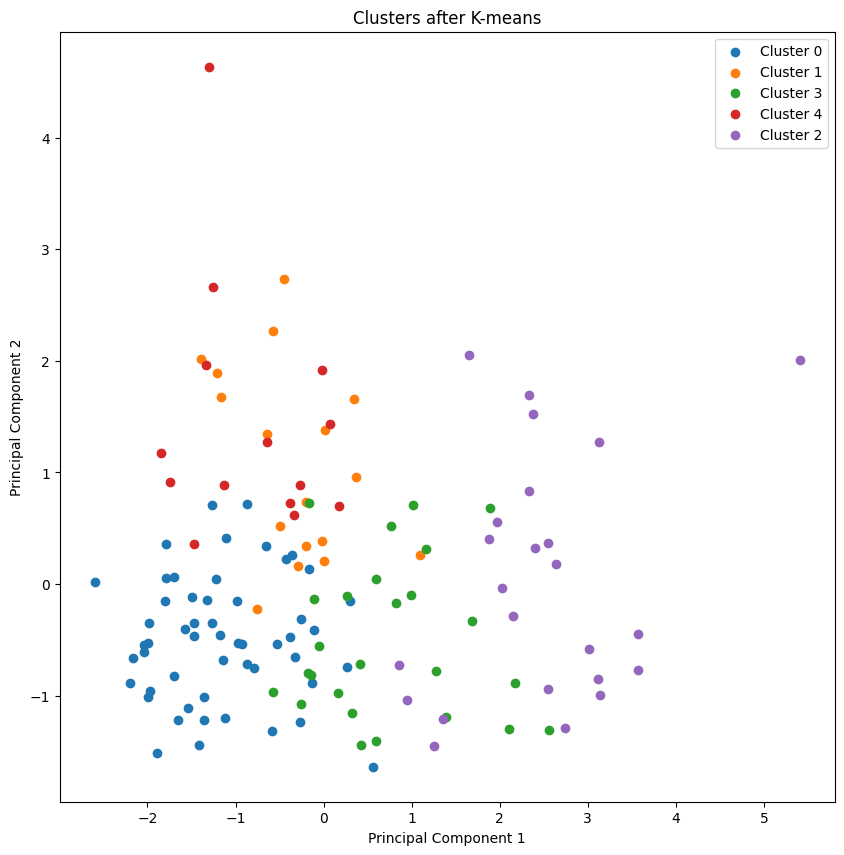

In [216]:
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Convert to dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add cluster labels to your dataframe
principalDf['Cluster'] = clusters

# Plot each cluster
plt.figure(figsize=(10, 10))

for cluster in unique_clusters:
    cluster_df = principalDf[principalDf['Cluster'] == cluster]
    plt.scatter(cluster_df['principal component 1'], cluster_df['principal component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after K-means')
plt.legend()
plt.show()


**Insight**

From our principal component analysis  we can see observe that Cluster 4 is mostly grouped on having a higher principal component 2 while Cluster 2 is mostly grouped on having a higher  principal component 1. Cluster 3, 1 and 0 seem to be somewhere inbetween maximizing for principal component 1 or principal component 2. Lets take a closer look into both of theses clusters to see what they might tell us about how the players have been grouped.

Given that I've selected statistics that focus on either a player's goal scoring ability or creative contribution to the team, I suspect that principal component 1 and 2 must be either one of these attributes (goal scoring ability vs creative contribution to the team)

In [220]:
df_stats5 = pd.merge(df_stats3, df_final[['Player', 'Cluster']], on='Player', how='left')
print(df_stats5)


In [253]:
fig = px.scatter(df_stats5, x='Cluster', y='Goals', hover_data=['Player','Min','Pos','Comp','G/SoT','PasAss','PasProg','GCA','Assists'], color='Cluster', size='Goals',color_continuous_scale='Viridis')

fig.show()


**Insight**

As expected one of the clusters (Cluster 4) is grouped by players who have raw ability to score goals at a higher level than others in our sample. As such, Cluster 4 represents forward players with the highest propensity to score goals.

In [249]:
fig = px.scatter(df_stats5, x='Cluster', y='Assists', hover_data=['Player','Min','Pos','Comp','G/SoT','PasAss','PasProg','GCA','Goals'], color='Cluster', size='Goals',color_continuous_scale='Viridis')

fig.show()

**Insight**

Likewise cluster 2 is grouped by players who have a raw ability to assist their teammates over others in our sample. I also checked the other creative metrics such as PasAss, PasProg and GCA where I found cluster 2 to have the players who perform the best in these attributes. As such, cluster 2 represents forwards who are able to offer the most amount of creative output to their team. 

# Creation of Sample Selections 

From each cluster, I decided to create seperate sample selections to help with the decision process. Decision sample 1 includes forward players in cluster 4 who are typically your high volume goal scorers. While Decision sample 2 includes forward players from cluster 2 who are typically creative outlets for the team. 

Since Manchester United is ultimately searching for their next Striker, I decided to analyze both groups based off pure goal conversion metrics such as goal/shot on target and minutes per goal which both measure goal conversion efficiency. Essentially the lower the minutes per goal and the higher the goal/shot in target, the more efficient the forward is at converting chances. Converting chances into goals is the primary objective of a striker and should be how we determine a final selection for Manchester Untied. 

However, the different decision samples will allow us to make a more calculated decision on the attributes that we want in Manchester United's next striker. For example, If Manchester United wanted a striker who is capable fo creating chances for the team at the cost of slightly less goal conversion then they'd opt to select the striker from decision sample 2. If Manchester United wanted a striker that was the most efficient goal converter, they'd select from decision sample. Ultimately, these decision samples serve to help a recruitment team systematically decide on the type of player they want to get. 

In [257]:
Decision_sample1 = df_stats5[df_stats5['Cluster'] == 4]
Decision_sample2 = df_stats5[df_stats5['Cluster'] == 2]


In [258]:
#Our final list of players from DS1
Decision_sample1_table_html = Decision_sample1.to_html()
Decision_sample1_table_html_with_css = f"<div style='height: 300px; overflow-y: scroll;'>{Decision_sample1_table_html}</div>"
display(HTML(Decision_sample1_table_html_with_css))

,Player,Comp,MP,Goals,Assists,Shots,SoT,G/SoT,SoT%,ShoDist,PasAss,PasProg,GCA,PKwon,AerWon%,Pos,Min,Age,Min/G,Cluster
6,Folarin Balogun,Ligue 1,21,14,0.06,3.33,1.58,0.36,47.5,15.2,0.85,1.98,0.34,0.11,20.0,FW,1591,21,113.642857,4
13,Wissam Ben Yedder,Ligue 1,19,14,0.24,2.46,1.59,0.50,64.5,15.7,1.03,3.33,0.56,0.08,34.8,FW,1135,32,81.071429,4
28,Jonathan David,Ligue 1,21,12,0.21,3.13,1.38,0.37,44.3,14.9,1.49,2.21,0.46,0.00,15.0,FW,1759,23,146.583333,4
48,Niclas Füllkrug,Bundesliga,19,13,0.16,3.03,1.19,0.41,39.3,16.6,1.35,3.46,0.32,0.00,58.3,FW,1667,30,128.230769,4
54,Erling Haaland,Premier League,20,25,0.16,3.85,1.98,0.58,51.4,12.6,0.93,1.87,0.38,0.05,52.1,FW,1636,22,65.440000,4
62,Joselu,La Liga,19,11,0.11,2.42,1.00,0.42,41.3,16.2,0.63,2.32,0.32,0.11,62.7,FW,1710,32,155.454545,4
70,Alexandre Lacazette,Ligue 1,22,13,0.19,2.85,1.40,0.30,49.2,14.9,1.59,3.60,0.33,0.05,45.5,FW,1923,31,147.923077,4
73,Robert Lewandowski,La Liga,17,14,0.27,4.32,2.23,0.42,51.6,12.8,1.15,3.24,0.54,0.00,51.2,FW,1334,34,95.285714,4
81,Lautaro Martínez,Serie A,21,12,0.16,3.92,1.51,0.39,38.4,14.8,1.56,2.80,0.48,0.05,46.2,FW,1675,25,139.583333,4
83,Kylian Mbappé,Ligue 1,19,13,0.12,4.42,2.21,0.31,50.0,16.2,1.84,4.11,0.49,0.06,54.5,FW,1468,24,112.923077,4


In [259]:
fig = px.scatter(Decision_sample1, x='G/SoT', y='Min/G', hover_data=['Player','Min','Pos','Comp'], color='Age', size='Assists',color_continuous_scale='plasma')

fig.show()

In [250]:
#Our final list of players from DS2
Decision_sample2_table_html = Decision_sample2.to_html()
Decision_sample2_table_html_with_css = f"<div style='height: 300px; overflow-y: scroll;'>{Decision_sample2_table_html}</div>"
display(HTML(Decision_sample2_table_html_with_css))

,Player,Comp,MP,Goals,Assists,Shots,SoT,G/SoT,SoT%,ShoDist,PasAss,PasProg,GCA,PKwon,AerWon%,Pos,Min,Age,Min/G,Cluster
20,Julian Brandt,Bundesliga,20,6,0.24,1.33,0.66,0.55,50.0,18.2,2.83,4.34,0.60,0.00,29.2,MFFW,1495,26,249.166667,2
25,Kingsley Coman,Bundesliga,14,4,0.36,3.13,0.84,0.57,26.9,19.0,2.77,4.22,0.72,0.12,50.0,FWMF,749,26,187.250000,2
30,Ousmane Dembélé,La Liga,18,5,0.41,3.20,1.15,0.36,35.9,17.8,2.79,4.75,0.82,0.00,15.4,FW,1100,25,220.000000,2
35,Paulo Dybala,Serie A,16,8,0.46,2.82,0.99,0.46,35.1,18.7,2.90,3.74,0.53,0.15,18.2,MFFW,1179,29,147.375000,2
44,João Félix,La Liga,14,4,0.42,3.61,1.67,0.33,46.2,18.9,1.39,3.75,0.69,0.00,46.7,FWMF,650,23,162.500000,2
47,Phil Foden,Premier League,18,7,0.34,2.41,1.21,0.50,50.0,14.2,1.90,4.05,0.78,0.00,45.2,FWDF,1045,22,149.285714,2
51,Serge Gnabry,Bundesliga,20,9,0.33,3.98,1.87,0.35,46.9,16.7,1.71,4.63,0.89,0.16,37.5,FWMF,1106,27,122.888889,2
55,Adam Hlo?ek,Bundesliga,18,3,0.31,2.35,0.92,0.33,39.1,18.2,1.73,2.65,0.82,0.00,35.7,FWMF,878,20,292.666667,2
56,Jonas Hofmann,Bundesliga,16,7,0.32,1.41,0.77,0.58,54.5,18.9,3.14,3.33,0.64,0.06,33.3,FW,1402,30,200.285714,2
59,Kelechi Iheanacho,Premier League,16,3,0.82,3.67,1.22,0.50,33.3,17.3,2.45,1.84,0.82,0.00,16.7,FWMF,443,26,147.666667,2


In [255]:
fig = px.scatter(Decision_sample2, x='G/SoT', y='Min/G', hover_data=['Player','Min','Pos','Comp'], color='Age', size='Assists',color_continuous_scale='Viridis')

fig.show()

# Selecting 3 Top Targets

Given my own personal preferences for a striker, I will now narrow the list down to 3 strikers who I'd think would make excellent options for Manchester United.

Manchester United can line up in a number of different systems using a striker under manager Ten Hag. Although I stressed that goal scoring efficiency is the most important criteria since it would help improve united the most, I think that an exceptionally talented creative player could under the right circumstances and system prove to be as effective as an efficient goal scorer. For this reason I will be selecting 2 options from sample selection 1 and 1 option from sample selection 2. 

In [262]:
# I filtered out players who are above the age of 28 because I believe Manchester United is looking for a long-term striker option (for at least 5 years).
# Strikers tend to dramatically decline after their 30's.
fig = px.scatter(Decision_sample1.query('Age <= 28'), x='G/SoT', y='Min/G', hover_data=['Player', 'Min', 'Pos', 'Comp','GCA','PasProg','PasAss'],
                       color='Age', size='Assists', color_continuous_scale='plasma')

fig.show()



### Choice 1: Victor Osimhen

Victor Osimhen is amongst one of the best strikers in Europe over the last season. He has currently taken S.S.C. Napoli to their first Serie A (Italian league) title since 1987. He has amongst the highest shot conversion efficiencies of any player in europe and at age 24 has a lot of time to get even better as a player. In terms of pure goal scoring ability, he is only bested by Erling Haaland who United would not be able to get since he is tied down on a long-term contract with their rivals Manchester City. 

Manchester United would benefit most from having a prolific goal scorrer of which Osimhen has shown that he is capable of becoming. He isn't entire devoid of creative ability since Osimhen also chips in with an assists every 5 games. My only criticism of Osimhen is that he doesn't progress the ball as effectively as other forwards which might indicate that he is somewhat lacking in his hold up play. I think this is ultimately a worthwhile compromise since he is so efficient at scoring goals. 

In [266]:
# I filtered out players who are above the age of 28 because I believe Manchester United is looking for a long-term striker option (for at least 5 years).
# Strikers tend to dramatically decline after their 30's.
fig = px.scatter(Decision_sample2.query('Age <= 28'), x='Assists', y='Min/G', hover_data=['Player', 'Min', 'Pos', 'Comp','GCA','PasProg','PasAss'],
                       color='Age', size='GCA', color_continuous_scale='Viridis')

fig.show()


### Choice 2: Randal Kolo Muani

If united want to go the route of having a more creative striker I think Kolo Muani would be an exceptional choice. Muani alongside Khvicha Kvaratskhelia are amongst some of the most creative and offensive goal scorrers the europe right now. However, I thought Muani would have been a better choice since his natural position is to be a striker while Kvaratskhelia primarily plays on the left wing where United already have a prolific goal scorrer in Marcus Rashford. It would be an easier transition for Muani into the United team and he would be able to create many chances for players like Rashford, Antony and Fernandes at United while also bagging in many goals. 

Muani also has some of the highest progressive passes, passes leading to a shot (PasAss) and assists per game amongst strikers. Overall Muani wouldn't score as much as Osimhen but he would improve the overall performance of Uniteds forward line enough that it would compensate for his lower goal scoring ability. 

Kelechi Iheanacho is a good shout but is just too injury prone as a player at a young age to be considered a long-term striker option for united. Jamal Musiala could be converted into a striker but I think Bayern Munich would be so reluctant to sell him and he'll end up costing far more than Osimhen. I really like Serge Gnabry as an option as well but I think I ultimately wouldn't choose him for the same reasons I wouldn't choose Kvaratskhelia, Gnabry isn't a natural striker and has struggled to play in that position for his national team Germany when he needed to. 

In [267]:
# I filtered out players who are above the age of 28 because I believe Manchester United is looking for a long-term striker option (for at least 5 years).
# Strikers tend to dramatically decline after their 30's.
fig = px.scatter(Decision_sample1.query('Age <= 28'), x='G/SoT', y='Min/G', hover_data=['Player', 'Min', 'Pos', 'Comp','GCA','PasProg','PasAss'],
                       color='Age', size='Assists', color_continuous_scale='plasma')

fig.show()


### Choice 3: Johnathan David

I think united should sign Johnathan David if they aren't able to get Osimhen or Muani. He will likely cost far less than the other 2 options and would be relatively easier for Manchester Untied to sign. Given his price i'd say David could be a great budget choice where he'd still be able to give united a high level of goal scoring efficiency but also free up funds to be invested in other areas of the pitch. David is also as creative a player as Osimhen while having better hold up play with a significantly higher progressive pass rate. However, he is significantly less effective at converting chances when compared to Osimhen but still an all around solid option for United. 

Lautaro Martinez would've been a great option but he is way too expensive to be a budget pick. Marcus Rashford is already a United player and Ivan Tony would have honestly been one of my top choices but he just got suspended for the 7 months of the football year due to insider betting making him a unviable option for United's current needs. 
